# 🏦 Loan Approval Prediction — Data Analysis & ML Model

This project aims to analyze real-world loan application data to identify key factors that influence whether a loan gets approved. The dataset includes information about applicants such as income levels, education, employment status, loan amount, credit history, and more.

## 🎯 Objective

- To understand the patterns and relationships between applicant features and loan approval decisions.
- To clean, explore, and visualize the data to extract actionable insights.
- To build and evaluate an interpretable machine learning model that predicts loan approval status (`Loan_Status`).

---

📁 **Dataset**: Loan prediction dataset with training and test files (used only train.csv here for modeling).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train_lp.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.dtypes


Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
df.shape

(614, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
# Categorical
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

# Numerical
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)

# Binary Numeric
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

# Drop Loan_ID
df.drop('Loan_ID', axis=1, inplace=True)


/var/folders/n1/3vpnqttd4x7c4cb2kl3s3mgm0000gn/T/ipykernel_5888/878729654.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
/var/folders/n1/3vpnqttd4x7c4cb2kl3s3mgm0000gn/T/ipykernel_5888/878729654.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

In [9]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#Handling missing values

In [11]:
df.duplicated().sum()

0

In [12]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [13]:
df['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [14]:
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})


In [15]:
df['Loan_Status'].value_counts()


Loan_Status
1    422
0    192
Name: count, dtype: int64

# Exploratory Data Analysis (EDA) + Visualization

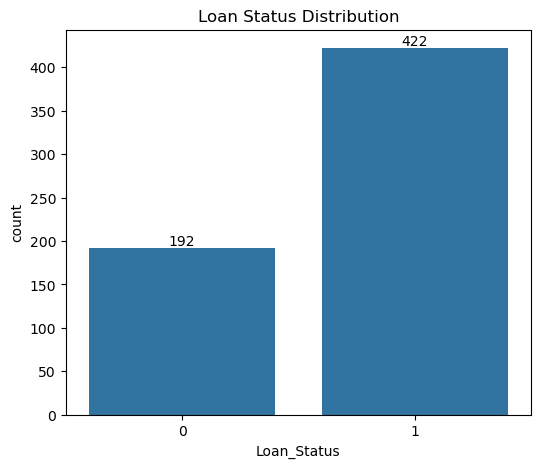

In [17]:

plt.figure(figsize=(6,5))
ax = sns.countplot(x='Loan_Status', data=df)
ax.bar_label(ax.containers[0])
plt.title('Loan Status Distribution')

plt.savefig("images/Loan Status Distribution.png", dpi=300, bbox_inches='tight')
plt.show()


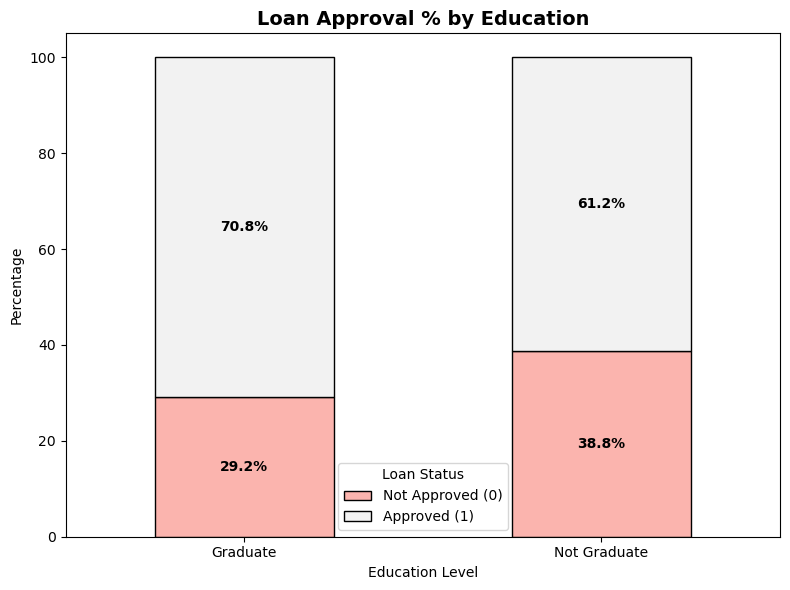

In [18]:
# Crosstab
edu_churn = pd.crosstab(df['Education'], df['Loan_Status'])
edu_churn_percent = edu_churn.div(edu_churn.sum(axis=1), axis=0) * 100

# Plot
ax = edu_churn_percent.plot(kind='bar', stacked=True, figsize=(8,6), colormap='Pastel1', edgecolor='black')

# Add percentage labels
for p in ax.patches:
    height = p.get_height()
    if height > 5:  # Show only if large enough to avoid clutter
        ax.annotate(f'{height:.1f}%', 
                    (p.get_x() + p.get_width() / 2, p.get_y() + height / 2), 
                    ha='center', va='center', fontsize=10, color='black', fontweight='bold')

# Titles and styling
plt.title("Loan Approval % by Education", fontsize=14, weight='bold')
plt.ylabel("Percentage")
plt.xlabel("Education Level")
plt.xticks(rotation=0)
plt.legend(title="Loan Status", labels=["Not Approved (0)", "Approved (1)"])
plt.tight_layout()
plt.savefig("images/Loan Approval % by Education.png", dpi=300, bbox_inches='tight')
plt.show()


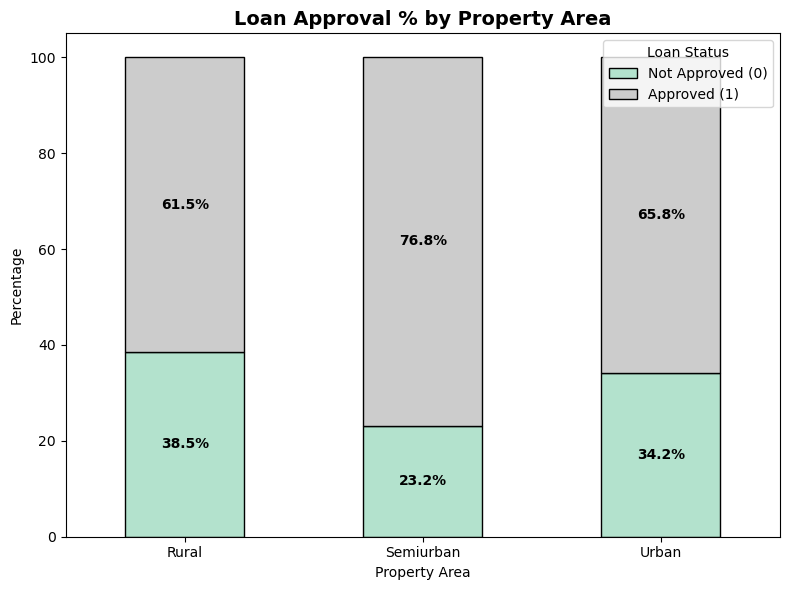

In [19]:
# Step 1: Cross-tabulation of Property_Area vs Loan_Status
area_churn = pd.crosstab(df['Property_Area'], df['Loan_Status'])

# Step 2: Convert to percentage
area_churn_percent = area_churn.div(area_churn.sum(axis=1), axis=0) * 100

# Step 3: Plot
ax = area_churn_percent.plot(kind='bar', stacked=True, figsize=(8,6), colormap='Pastel2', edgecolor='black')

# Step 4: Add percentage labels
for p in ax.patches:
    height = p.get_height()
    if height > 5:  # Avoid clutter
        ax.annotate(f'{height:.1f}%', 
                    (p.get_x() + p.get_width() / 2, p.get_y() + height / 2), 
                    ha='center', va='center', fontsize=10, color='black', fontweight='bold')

# Step 5: Formatting
plt.title("Loan Approval % by Property Area", fontsize=14, weight='bold')
plt.ylabel("Percentage")
plt.xlabel("Property Area")
plt.xticks(rotation=0)
plt.legend(title="Loan Status", labels=["Not Approved (0)", "Approved (1)"])
plt.tight_layout()
plt.savefig("images/Loan Approval % by Property Area.png", dpi=300, bbox_inches='tight')
plt.show()


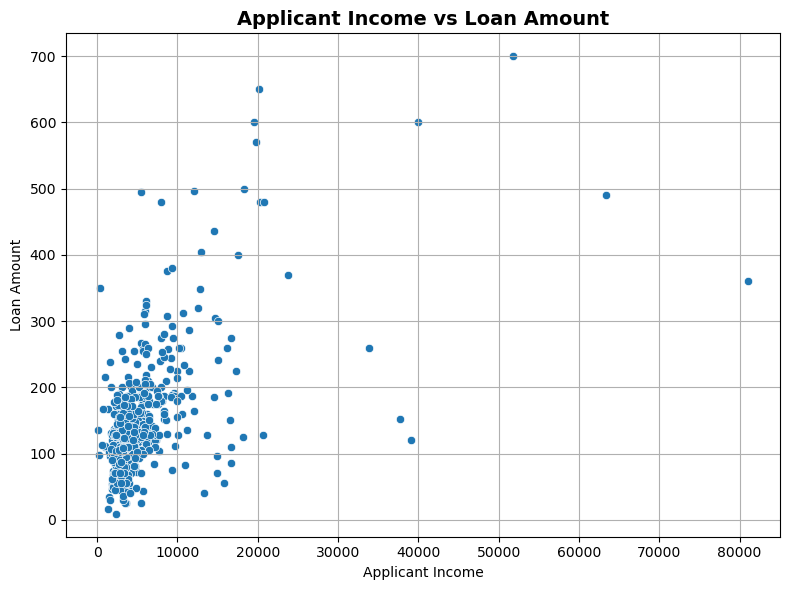

In [20]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', data=df)
plt.title("Applicant Income vs Loan Amount", fontsize=14, weight='bold')
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.grid()
plt.tight_layout()

plt.savefig("images/Applicant Income vs Loan Amount.png", dpi=300, bbox_inches='tight')
plt.show()


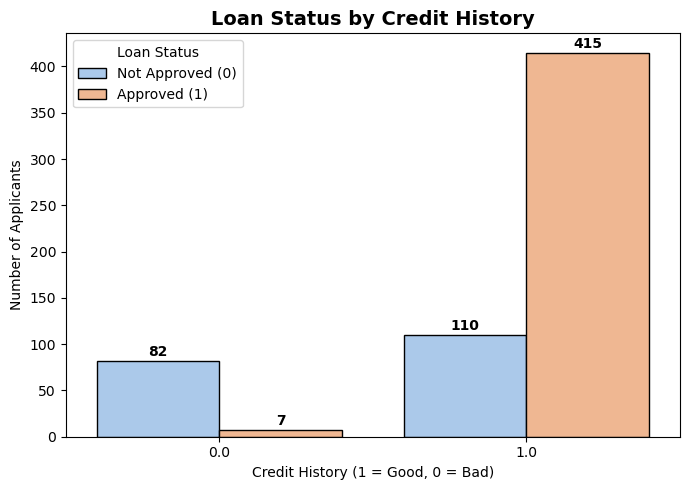

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
ax = sns.countplot(x='Credit_History', hue='Loan_Status', data=df, palette='pastel', edgecolor='black')

# Add labels
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.text(bar.get_x() + bar.get_width() / 2, height + 2,
                    f'{int(height)}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title("Loan Status by Credit History", fontsize=14, weight='bold')
plt.xlabel("Credit History (1 = Good, 0 = Bad)")
plt.ylabel("Number of Applicants")
plt.legend(title="Loan Status", labels=["Not Approved (0)", "Approved (1)"])
plt.tight_layout()

plt.savefig("images/Loan Status by Credit History.png", dpi=300, bbox_inches='tight')
plt.show()


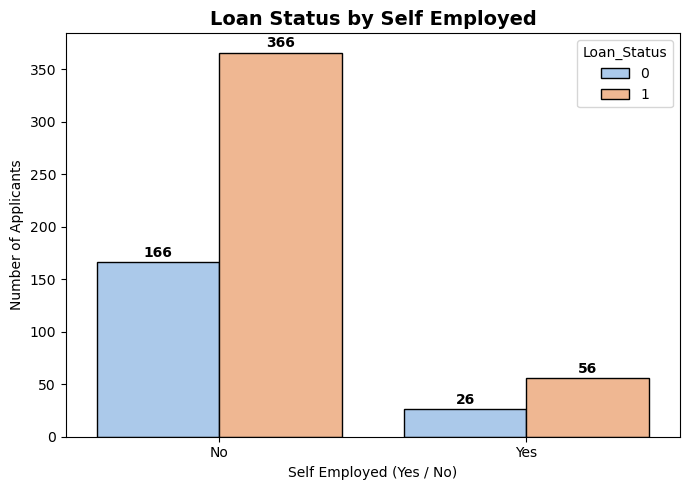

In [22]:
plt.figure(figsize=(7,5))
ax = sns.countplot(x='Self_Employed', hue='Loan_Status', data=df, palette='pastel', edgecolor='black')

# Add labels
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.text(bar.get_x() + bar.get_width() / 2, height + 2,
                    f'{int(height)}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title("Loan Status by Self Employed", fontsize=14, weight='bold')
plt.xlabel("Self Employed (Yes / No)")
plt.ylabel("Number of Applicants")
plt.tight_layout()

plt.savefig("images/Loan Status by Self Employed.png", dpi=300, bbox_inches='tight')
plt.show()


/var/folders/n1/3vpnqttd4x7c4cb2kl3s3mgm0000gn/T/ipykernel_5888/2608162637.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Loan_Status', y='CoapplicantIncome', data=df, palette='Set2')


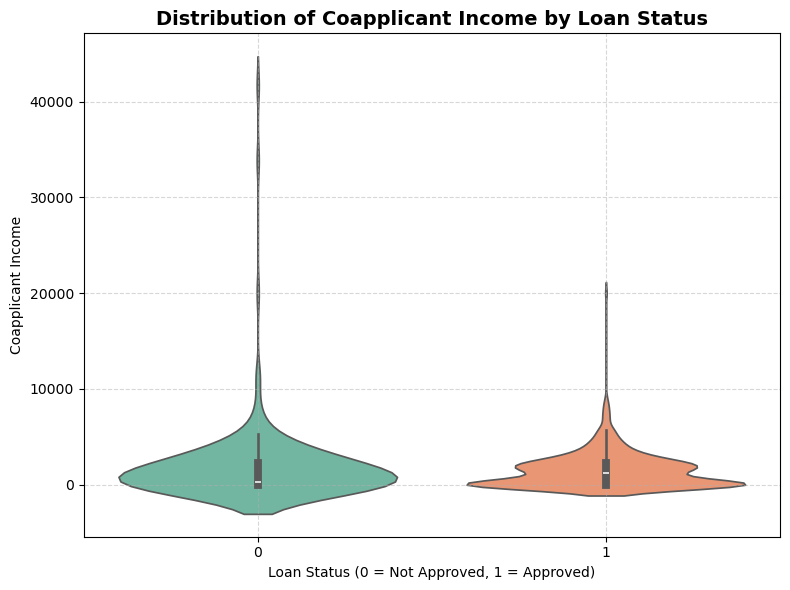

In [23]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Loan_Status', y='CoapplicantIncome', data=df, palette='Set2')

plt.title("Distribution of Coapplicant Income by Loan Status", fontsize=14, weight='bold')
plt.xlabel("Loan Status (0 = Not Approved, 1 = Approved)")
plt.ylabel("Coapplicant Income")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

plt.savefig("images/Distribution of Coapplicant Income by Loan Status.png", dpi=300, bbox_inches='tight')
plt.show()

 # Feature Engineering

print(df.columns)


In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Label Encoding
df['Gender'] = le.fit_transform(df['Gender'])
df['Married'] = le.fit_transform(df['Married'])
df['Education'] = le.fit_transform(df['Education'])
df['Self_Employed'] = le.fit_transform(df['Self_Employed'])

# Custom Mapping
df['Dependents'] = df['Dependents'].replace({'3+': 3}).astype(float)

# One-hot Encoding
df = pd.get_dummies(df, columns=['Property_Area'], drop_first=True)


In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount']
df[num_cols] = scaler.fit_transform(df[num_cols])

# Split the Data

In [29]:
from sklearn.model_selection import train_test_split

X = df.drop(['Loan_Status'],axis =1)
y = df['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

# Model Training 

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


In [64]:
# Logistic Regression 
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier()

In [68]:
# Predictions
lr_pred = lr_model.predict(X_test)
dt_pred = dt_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

In [88]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Logistic Regression
print("📌 Model: Logistic Regression")
print("Accuracy:", accuracy_score(y_test, lr_pred))
print("Classification Report:\n", classification_report(y_test, lr_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, lr_pred))
print("-" * 50)

# Decision Tree
print("📌 Model: Decision Tree")
print("Accuracy:", accuracy_score(y_test, dt_pred))
print("Classification Report:\n", classification_report(y_test, dt_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_pred))
print("-" * 50)

# Random Forest
print("📌 Model: Random Forest")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("Classification Report:\n", classification_report(y_test, rf_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("-" * 50)


📌 Model: Logistic Regression
Accuracy: 0.7886178861788617
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

Confusion Matrix:
 [[18 25]
 [ 1 79]]
--------------------------------------------------
📌 Model: Decision Tree
Accuracy: 0.6991869918699187
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.51      0.54        43
           1       0.75      0.80      0.78        80

    accuracy                           0.70       123
   macro avg       0.67      0.66      0.66       123
weighted avg       0.69      0.70      0.69       123

Confusion Matrix:
 [[22 21]
 [16 64]]
--------------------------------------------------
📌 Model: R

# Save Model

In [90]:
import joblib
joblib.dump(lr_model, 'loan_approval_model.joblib')


['loan_approval_model.joblib']

# Feature Importance

In [102]:
feat_imp = pd.DataFrame({
    'Feature': features,
    'Importance': importance
})

# Round values for clarity
feat_imp['Importance'] = feat_imp['Importance'].round(4)

print(feat_imp)

                    Feature  Importance
0                    Gender     -0.4721
1                   Married      0.5047
2                Dependents      0.0995
3                 Education     -0.4321
4             Self_Employed     -0.0059
5           ApplicantIncome     -0.0643
6         CoapplicantIncome     -0.1917
7                LoanAmount     -0.0716
8          Loan_Amount_Term     -0.0019
9            Credit_History      3.1148
10  Property_Area_Semiurban      0.6582
11      Property_Area_Urban     -0.1363


/var/folders/n1/3vpnqttd4x7c4cb2kl3s3mgm0000gn/T/ipykernel_5888/1749706031.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp, palette='coolwarm')
/var/folders/n1/3vpnqttd4x7c4cb2kl3s3mgm0000gn/T/ipykernel_5888/1749706031.py:12: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from current font.
  plt.tight_layout()
/var/folders/n1/3vpnqttd4x7c4cb2kl3s3mgm0000gn/T/ipykernel_5888/1749706031.py:15: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from current font.
  plt.savefig('images/feature_importance_logistic.png', dpi=300)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


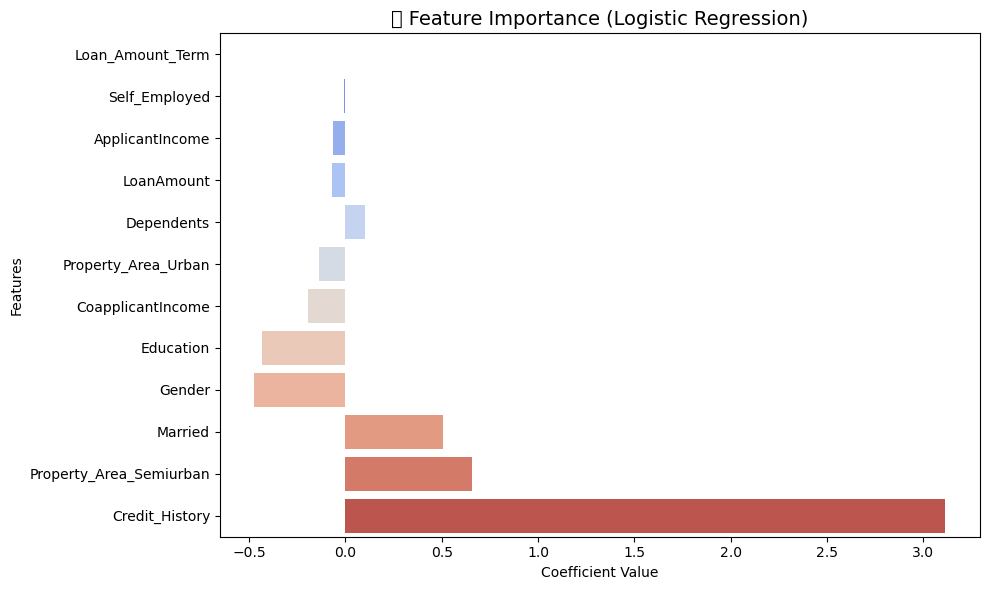

In [106]:
# Sort features by absolute importance for better visual clarity
feat_imp['Abs_Importance'] = feat_imp['Importance'].abs()
feat_imp = feat_imp.sort_values(by='Abs_Importance', ascending=True)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp, palette='coolwarm')

plt.title('📌 Feature Importance (Logistic Regression)', fontsize=14)
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.tight_layout()

# Save the plot (before showing it)
plt.savefig('images/feature_importance_logistic.png', dpi=300)
plt.show()

## 📌 Feature Importance Interpretation

- `Credit_History` has the highest positive impact — customers with good credit are far more likely to get approved.
- `LoanAmount` has a negative impact — higher loan amounts slightly reduce approval chances.
- `Gender`, `Married`, and `Self_Employed` have relatively low influence.

This helps in understanding what drives the model’s decision and aids business teams in interpreting predictions.


# ✅ Conclusion & Next Steps

## 🔑 Key Steps Covered

- Performed Exploratory Data Analysis (EDA)
- Cleaned and imputed missing values
- Applied Label Encoding and One-Hot Encoding
- Standardized numerical features
- Visualized feature importance using Logistic Regression
- Built and compared Logistic Regression, Decision Tree, and Random Forest models
- Evaluated accuracy, recall, F1-score, and confusion matrix

## 🧠 Outcome

Logistic Regression achieved the highest recall on approved loans, making it ideal for minimizing false rejections.

---

📌 This end-to-end pipeline demonstrates a complete data science workflow, making it suitable for real-world business use cases and recruiter review.
